In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the CSV

df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [3]:
# Inspecting first 5 rows

df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [6]:
# inspecting size of dataset

len(df)

99

In [4]:
# inspecting the features

df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [21]:
# checking if the dataset have some missing values

df.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [5]:
# inspecting number of unique values for every feature

for x in df.columns:
    print(x, ':', df[x].nunique())

Age : 22
Profession : 2
Marrital Status : 2
Education : 2
No of Dependents : 4
Personal loan : 2
House Loan : 2
Wife Working : 3
Salary : 24
Wife Salary : 14
Total Salary : 36
Make : 9
Price : 10


In [7]:
# Wife working should be binary (must contain only Yes and No) but it has 3

df['Wife Working'].unique()

array(['No', 'Yes', 'm'], dtype=object)

In [8]:
# inspecting rows with Wife Working = 'm'

df[df['Wife Working'] == 'm']

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [9]:
# We can see Wife Salary == 0 so we must replace 'm' with 'No'

df['Wife Working'] = df['Wife Working'].replace({'m' : 'No'})

In [10]:
df['Wife Working'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
# dividing the features into categorical and continous features for easy visualisations

col_cat = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']

col_con = []
for x in df.columns:
    if x not in col_cat and x != 'Make':
        col_con.append(x)

print('Categorical Features:', col_cat)
print('Continous Features', col_con)

Categorical Features: ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working']
Continous Features ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']


In [46]:
# lets view describption of our dataset

df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


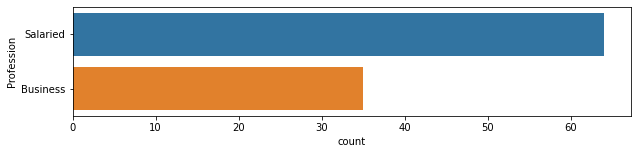

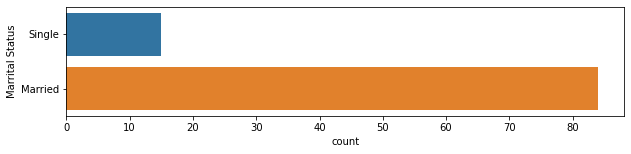

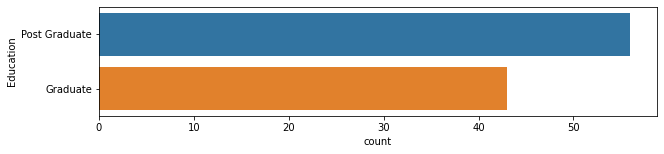

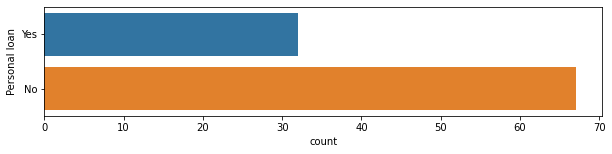

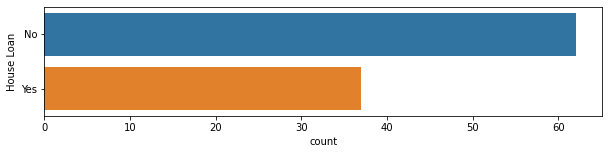

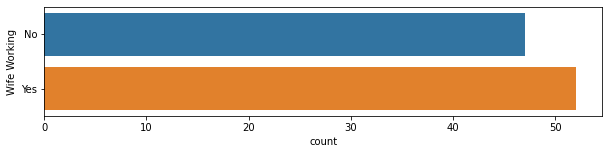

In [20]:
# inspecting distribution of categorical variables by count plot

for x in col_cat:
    plt.figure(figsize = (10, 2))
    sns.countplot(y = df[x])

#### From above count plots we get intuition above the categorical variables

**1) Salaried Class is more probable to buy a Car than Business one** (this makes sense because moslty cars are bought on EMI and banks tend to give EMI scheme to salaried class more beacuse of their fixed monthly income unlike business class whose fixed monthly income is hard to evaluate).

**2) Married people is more probable to buy a Car than Single People.**

**3) People with no House loan or Personal Loan is more probable to buy a Car than people who have Loans** (this also makes sense because banks tend to give EMI to those people who don't have any loans pending.

In [24]:
col_con

['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Price']

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

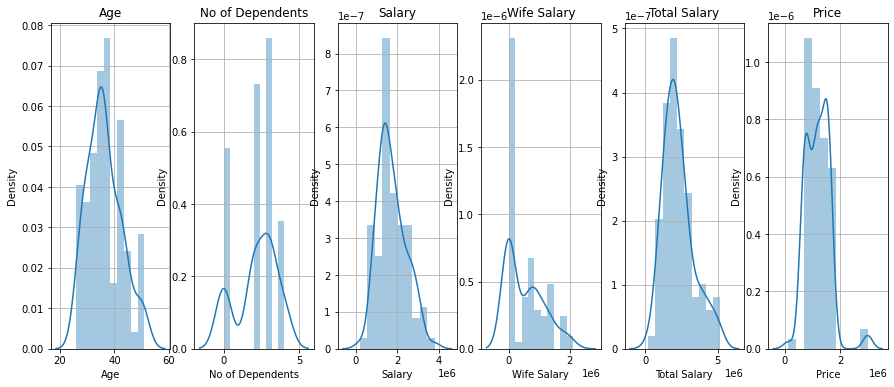

In [35]:
# now lets inspect distribution of continous variabels by distribution plot

plt.figure(figsize=(15, 6))
n = 0

for x in col_con:
    n += 1
    plt.subplot(1, 6, n)
    plt.grid()
    sns.distplot(df[x], bins = 10)
    plt.title(x)

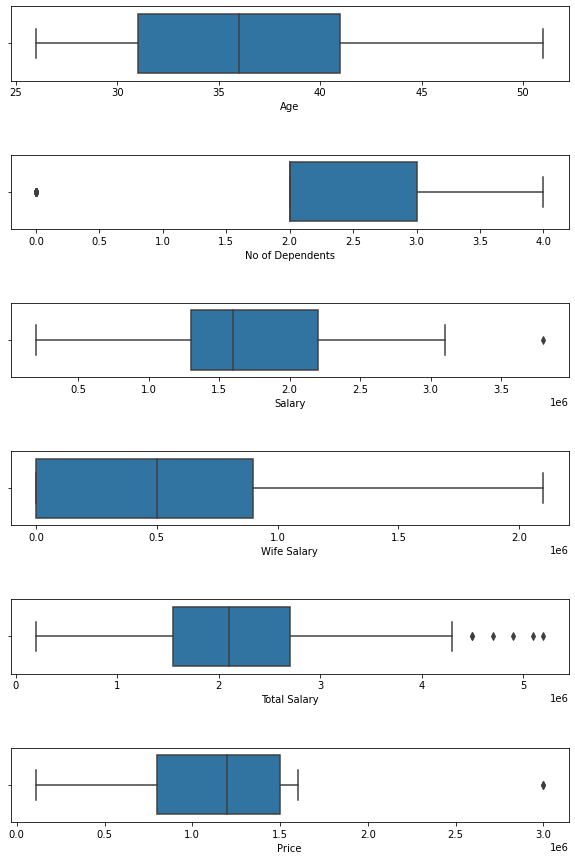

In [45]:
# plotting the box plots for continous variables

plt.figure(figsize=(10, 15))
n = 0

for x in col_con:
    n += 1
    plt.subplot(6, 1, n)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    sns.boxplot(x = df[x])

#### From above box plot and distplot we can get some intutions

**1)  Age group** between 32-42 have high density (36 being the median).

**2)  Number of dependents** between 2-3 have high density.

**3)  Price of the Car** between 8-15 lakhs have high density (12 lakhs being the median).

**4)  Total Salary** between 15-27 lakhs have high density (21 lakhs being the median).

In [48]:
# We can also cross check our intutuion about the distribution using numpy 

for x in col_con:
    print('Median of', x, ': ', np.median(df[x]))

Median of Age :  36.0
Median of No of Dependents :  2.0
Median of Salary :  1600000.0
Median of Wife Salary :  500000.0
Median of Total Salary :  2100000.0
Median of Price :  1200000.0


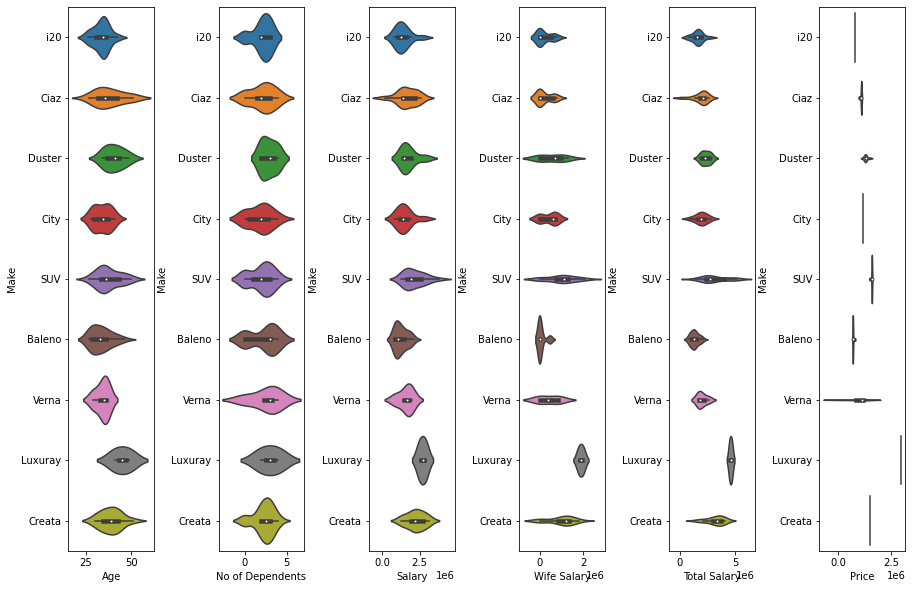

In [53]:
# We now plot Violin plot which essentialy more informative than a plain box plot. 
# While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. 
# The difference is particularly useful when the data distribution is multimodal (more than one peak).

# plotting the box plots for continous variables

plt.figure(figsize=(15, 10))
n = 0

for x in col_con:
    n += 1
    plt.subplot(1, 6, n)
    plt.subplots_adjust(wspace=0.75)
    sns.violinplot(x = df[x], y = df['Make'])

In [54]:
# calclating mean price of the cars sold for every cars

price_by_name = {}
for x in df['Make'].unique():
    price_by_name[x] = np.mean(df[df['Make'] == x]['Price'])

In [55]:
price_by_name

{'i20': 800000.0,
 'Ciaz': 1091666.6666666667,
 'Duster': 1314285.7142857143,
 'City': 1200000.0,
 'SUV': 1594736.8421052631,
 'Baleno': 705263.1578947369,
 'Verna': 902500.0,
 'Luxuray': 3000000.0,
 'Creata': 1500000.0}

<AxesSubplot:xlabel='Make', ylabel='Price'>

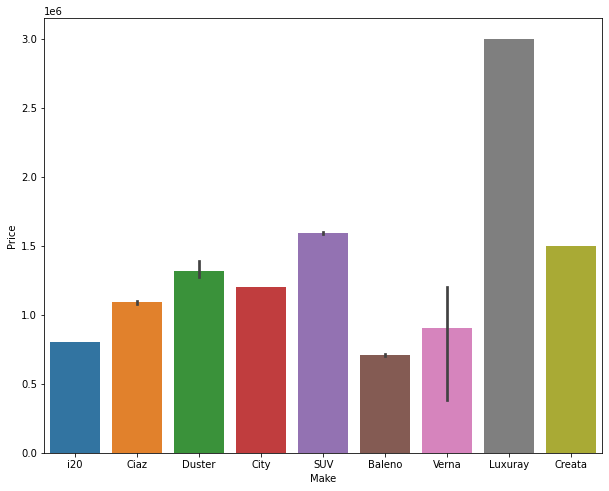

In [72]:
# Plotting average price of car by name

plt.figure(figsize = (10, 8))
sns.barplot(x = 'Make', y = 'Price', data = df)

#### Now we will binarize all Categorical Columns

In [76]:
col_cat

['Profession',
 'Marrital Status',
 'Education',
 'Personal loan',
 'House Loan',
 'Wife Working']

In [77]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [88]:
df_encoded = df.copy()

df_encoded['Profession'] = df_encoded['Profession'].map(lambda x: 1 if x == 'Salaried' else 0)

df_encoded['Marrital Status'] = df_encoded['Marrital Status'].map(lambda x: 1 if x == 'Married' else 0)
df_encoded['House Loan'] = df_encoded['House Loan'].map(lambda x: 1 if x == 'Yes' else 0)
df_encoded['Personal loan'] = df_encoded['Personal loan'].map(lambda x: 1 if x == 'Yes' else 0)
df_encoded['Wife Working'] = df_encoded['Wife Working'].map(lambda x: 1 if x == 'Yes' else 0)

df_encoded['Education'] = df_encoded['Education'].map(lambda x: 1 if x == 'Post Graduate' else 0)

In [89]:
# inspecting the new data frame created

df_encoded.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,1,0,1,0,1,0,0,800000,0,800000,i20,800000
1,35,1,1,1,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,0,1,0,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,0,1,1,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,1,1,1,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [90]:
# We also scale the dataset with MinMax scaler as most of the clustering algorithms are distance based and we dont want that the
# magnitude of feature decides the importance of feature.

from sklearn.preprocessing import MinMaxScaler

df_encoded.drop(['Make'], axis = 1, inplace = True)

df_encoded_scaled = MinMaxScaler().fit_transform(df_encoded)

In [91]:
# Converting back to DataFrame for visualizations

df_encoded_scaled = pd.DataFrame(data = df_encoded_scaled, columns=df_encoded.columns)

In [94]:
# inspecting first 5 rows of encoded and scaled dataset

df_encoded_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571


<AxesSubplot:>

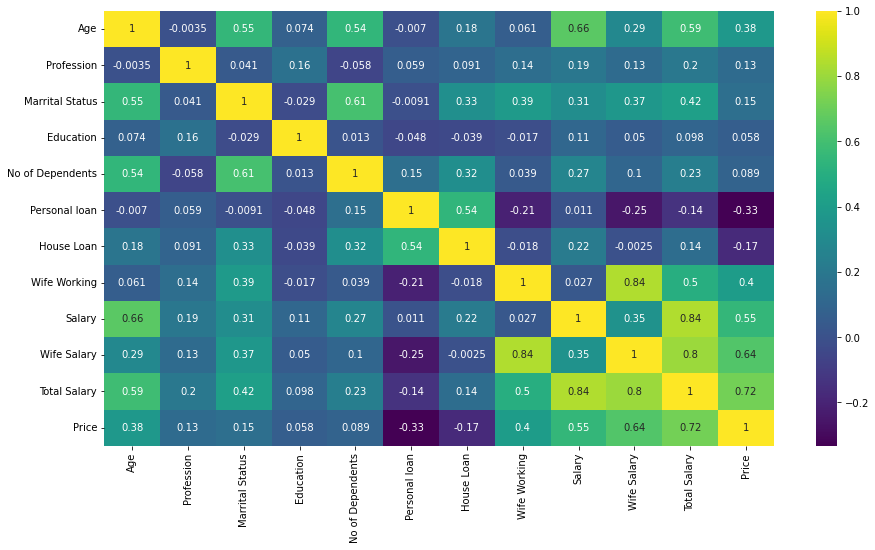

In [99]:
# Plotting a heatmap to see the correlation between variables

plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded_scaled.corr(), annot = True, cmap = 'viridis')

#### From the above heat map we can see some points like  :-

**1) Price of the car is positively correlated with Total Salary.**

**2) Price of the car is negatively correlated with House or Personal Loans.** (People tend to buy cheaper cars if they are in some kind of loan.

**3) Price of the car is postively correlated with Wife Working.** (This may be true because if both are working then total salary of the family is high and hence they tend to buy expensive cars).

**4) Price of the car is positively correlated with Age**. 

### Kmeans Clustering

In [103]:
# importing libraries

from sklearn.cluster import KMeans

In [115]:
# we will run clustering algo for diffrent K's and then find optimal K using elbow method

inertias = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_encoded_scaled)
    inertias[k] = kmeans.inertia_

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


Text(0, 0.5, 'Inertia')

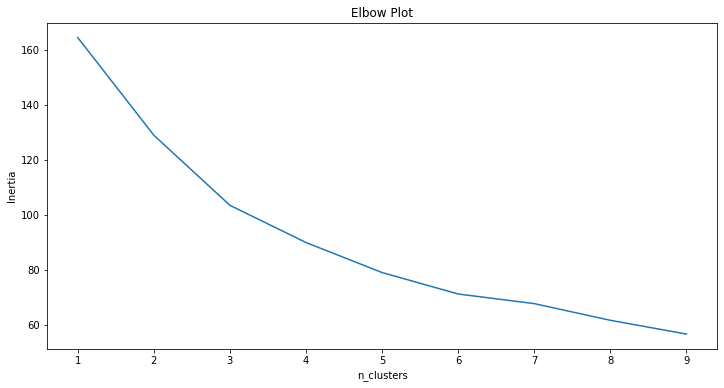

In [120]:
# plotting the inertia vs K plot to find optimal K

plt.figure(figsize = (12, 6))
plt.plot(inertias.keys(), inertias.values())
plt.title('Elbow Plot')
plt.xlabel('n_clusters')
plt.ylabel('Inertia')

In [118]:
# There is a sharp change in slope at K = 3 so proceeding with K = 3

kmeans = KMeans(n_clusters=3)
df_encoded_scaled['cluster'] = kmeans.fit_predict(df_encoded_scaled)

In [119]:
# inspecting the result

df_encoded_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,cluster
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754,0
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958,2
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163,1
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571,1


In [144]:
# helper functions to help us find proper segmentation variables

# function to find out optimal K

def plotElbow(features, x):
    x = x.loc[:, features]
    
    # Storing Inertia for every K
    inertias = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(x)
        inertias[k] = kmeans.inertia_
        
    # Plotting Elbow Plot
    plt.figure(figsize = (8, 6))
    plt.plot(inertias.keys(), inertias.values())
    plt.title('Elbow Plot: ' + str(features))
    plt.xlabel('n_clusters')
    plt.ylabel('Inertia')
    

# function to plot segments after knowing the optimal K

def plotSegments(features, x, k):
    x = x.loc[:, features]
    
    kmeans = KMeans(n_clusters=k)
    x['cluster'] = kmeans.fit_predict(x)
    
    # plotting the segments
    colors = ['red', 'green', 'blue', 'yellow', 'brown', 'orange']
    
    plt.figure(figsize = (8, 6))
    sns.scatterplot(x = df[features[0]], y = df[features[1]], hue = x['cluster'], palette = colors[:k])
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title('Segmentation using variables: ' + str(features))
    plt.show()

### Using Age and Price for segmentation

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


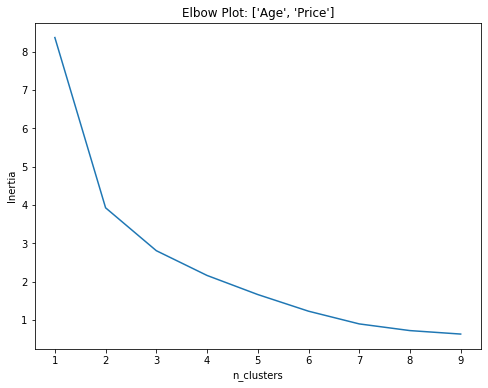

In [145]:
plotElbow(['Age', 'Price'], df_encoded_scaled)

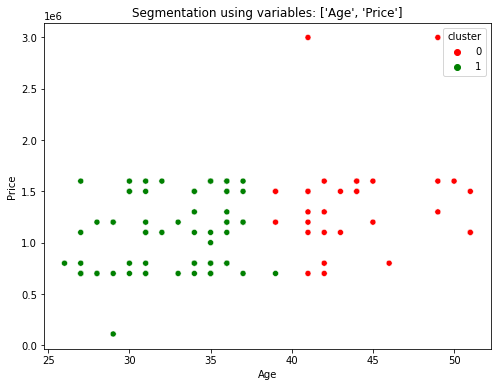

In [146]:
plotSegments(['Age', 'Price'], df_encoded_scaled, 2)

#### From above plot we can see we can divide the market into 2 segments.
**We can see clear boundry in Age at around 38.**

**Due to less data we cannot clearly see boundry on the price axis but we can get the intuition that the two segments are Age <= 38 and low to medium priced vehicles and other is Age > 38 and medium to high priced vehicle.**

### Using Total Salary and Price for segmentation

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


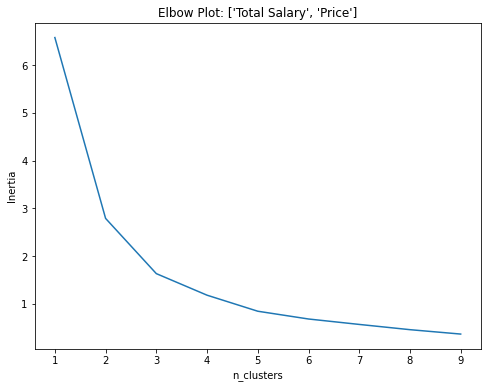

In [147]:
plotElbow(['Total Salary', 'Price'], df_encoded_scaled)

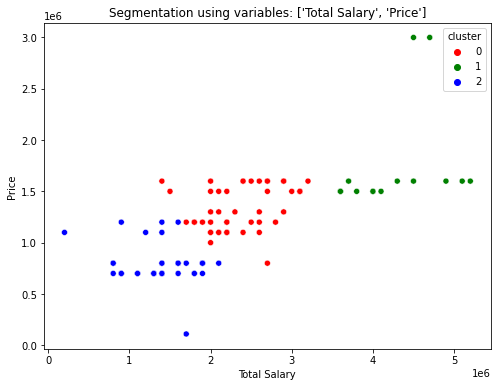

In [148]:
# we see K = 3 will be a good choice

plotSegments(['Total Salary', 'Price'], df_encoded_scaled, 3)

#### From the above segmentation plot we can see that we can easily divide market into 3 segments using Total Salary and Price

**1st segment is people with Annual Salary <= 20 lakhs and they prefer low end vehicles with price ranging in between 5-12 lakhs.**

**2nd segment is people with Annual Salary in between 20-30 lakhs and they prefer medium end vehicles with price ranging in between 10-17 lakhs.**

**3rd segment is people with Annual Salary > 30 lakhs and they prefer high end vehicles with price above 18 lakhs.**



In [151]:
df_encoded_scaled

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price,cluster
0,0.04,1.0,0.0,1.0,0.00,1.0,0.0,0.0,0.166667,0.000000,0.12,0.238754,0
1,0.36,1.0,1.0,1.0,0.50,1.0,1.0,1.0,0.333333,0.285714,0.36,0.307958,2
2,0.76,0.0,1.0,0.0,1.00,1.0,1.0,0.0,0.444444,0.000000,0.32,0.377163,2
3,0.60,0.0,1.0,1.0,0.75,0.0,0.0,1.0,0.388889,0.285714,0.40,0.377163,1
4,0.20,1.0,1.0,1.0,0.50,1.0,0.0,1.0,0.444444,0.380952,0.48,0.515571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.04,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.611111,0.000000,0.44,0.515571,0
95,0.96,1.0,1.0,1.0,0.75,0.0,0.0,1.0,1.000000,0.619048,0.98,0.515571,1
96,1.00,0.0,1.0,0.0,0.50,1.0,1.0,0.0,0.555556,0.000000,0.40,0.342561,2
97,1.00,1.0,1.0,1.0,0.50,0.0,0.0,1.0,0.694444,0.619048,0.76,0.480969,1


### Using Age and Total Salary as segmentation variables

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


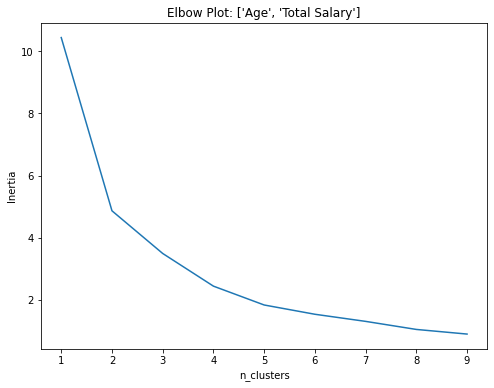

In [157]:
plotElbow(['Age', 'Total Salary'], df_encoded_scaled)

In [161]:
# From the above plot we see at K = 2 and K = 4 there is a slope change so we can choose any value between 2-4.
# Here I am choosing K = 3 as optimal

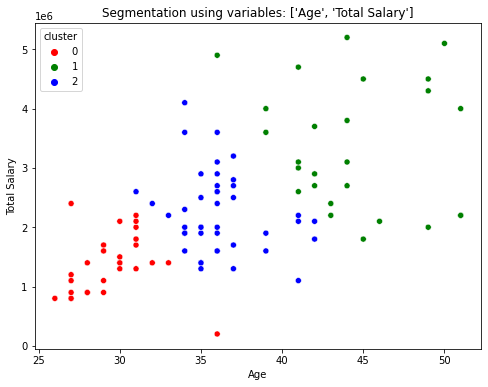

In [162]:
plotSegments(['Age', 'Total Salary'], df_encoded_scaled, 3)

#### From the above segmentation plot we can see that we can easily divide market into 3 segments using Age and Total Salary.

**1st segment is people with Age <= 33 and have salaries < 20 lakhs.**

We can make vehicles that **priced very aggresively** (targeting low salaried, young group). The vehicles can be marketed as sporty with many colors. This may be the first car of many people in this segment due to low price, and due to **different color variants and sports appeal** many new young customers will be attracted. Hatchbacks can be ideal Vehicle Category.


**2nd segment is people Annual Salary in between 20-30 lakhs and are have age in between 35-45.**

The car can be made including all necessary features. As this is the mid range segment and large customers audience will be attracted towards it. Car can be marketed as Comfort Car with high economy and Good looking. Small SUV's and Sedans can be a ideal vehicle Category.

**3rd segment is people with Annual Salary > 30 lakhs and have Age above 40 years.**

This will be niche segment and the price of the car will be high. The car must have Luxury feel, full safety and comfort as target audience is of higher age and higher income group.The Car can be marketed to have good interiors, top class safety and utmost comfort. Luxury Coupes, LMV's(Large Motor Vehicle) can be a ideal Vehicle Category.



### Using Age, Total Salary, Price as segmentation Variables

C:\Users\akshay\anaconda3\envs\pytorch\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


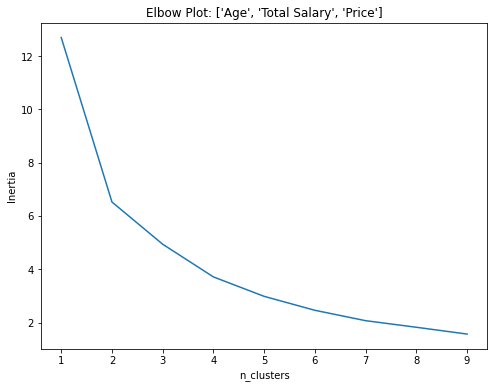

In [163]:
plotElbow(['Age', 'Total Salary', 'Price'], df_encoded_scaled)

In [178]:
# helper function to plot 3d segmentation plots

def plotSegments3D(feature, x):
    x1 = df_encoded_scaled.loc[:, feature]
    
    kmeans = KMeans(n_clusters=3)
    x['cluster'] = kmeans.fit_predict(x1)
    
    # plotting the segments
    
    fig = plt.figure(figsize = (15, 15))
    
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[x['cluster'] == 0][feature[0]], x[x['cluster'] == 0][feature[1]], x[x['cluster'] == 0][feature[2]], c = 'green')
    ax.scatter(x[x['cluster'] == 1][feature[0]], x[x['cluster'] == 1][feature[1]], x[x['cluster'] == 1][feature[2]], c = 'blue')
    ax.scatter(x[x['cluster'] == 2][feature[0]], x[x['cluster'] == 2][feature[1]], x[x['cluster'] == 2][feature[2]], c = 'red')
    ax.view_init(30, 185)
    
    ax.set_xlabel(feature[0], fontweight ='bold')
    ax.set_ylabel(feature[1], fontweight ='bold')
    ax.set_zlabel(feature[2], fontweight ='bold')
    plt.title('Segmentation using variables: ' + str(feature))
    plt.show()

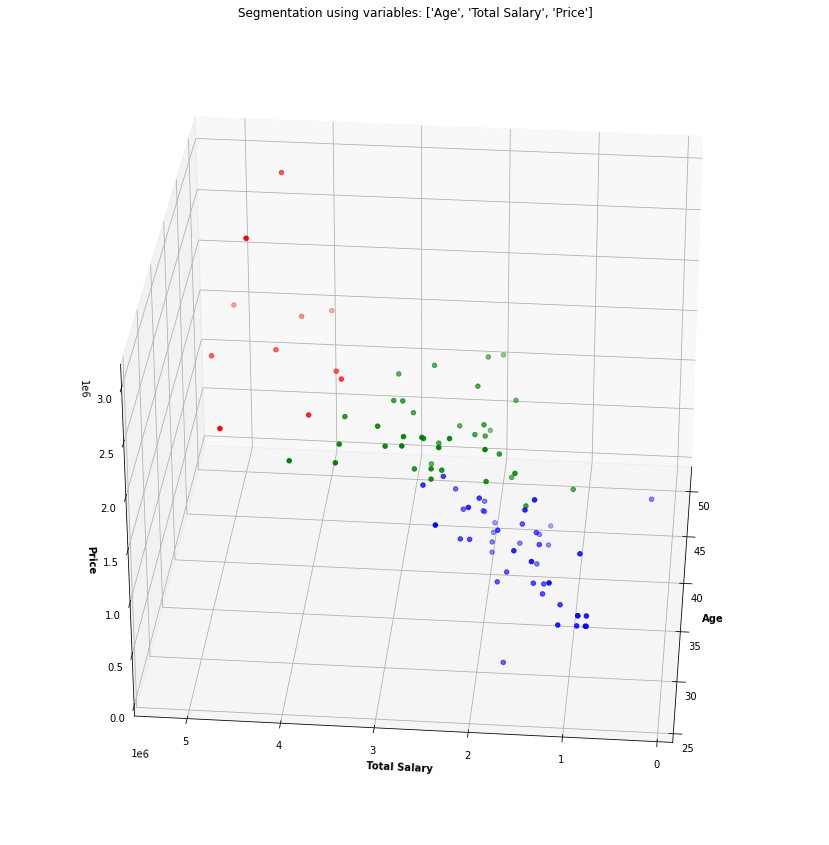

In [179]:
plotSegments3D(['Age', 'Total Salary', 'Price'], df)

### From above segmentation plot we can see that we can easily divide the market into 3 segments.

**The Segments will be similar to the 2d segmentation using variable Age and Total Salary**.

The segments were:-

**1st segment is people with Age <= 33 and have salaries < 20 lakhs.**

We can make vehicles that **priced very aggresively** (targeting low salaried, young group). The vehicles can be marketed as sporty with many colors. This may be the first car of many people in this segment due to low price, and due to **different color variants and sports appeal** many new young customers will be attracted. Hatchbacks can be ideal Vehicle Category.


**2nd segment is people Annual Salary in between 20-30 lakhs and are have age in between 35-45.**

The car can be made including all necessary features. As this is the mid range segment and large customers audience will be attracted towards it. Car can be marketed as Comfort Car with high economy and Good looking. Small SUV's and Sedans can be a ideal vehicle Category.

**3rd segment is people with Annual Salary > 30 lakhs and have Age above 40 years.**

This will be niche segment and the price of the car will be high. The car must have Luxury feel, full safety and comfort as target audience is of higher age and higher income group.The Car can be marketed to have good interiors, top class safety and utmost comfort. Luxury Coupes, LMV's(Large Motor Vehicle) can be a ideal Vehicle Category.

**The price for the car of each segments can be decided by reading the above 3D segmentation Plot.**